# Libraries installation

In [18]:
!pip install pandas -q
!pip install numpy -q
!pip install yfinance -q
!pip install matplotlib -q

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# Building investment wallet

In [13]:
# Period
start = "2018-01-01"
end = f"{datetime.now():%Y-%m-%d}"

# Selection of wallet assets
assets = ["BBAS3.SA", "B3SA3.SA", "ITSA4.SA", "PETR4.SA", "VALE3.SA",
          "TRPL4.SA", "EGIE3.SA", "TAEE11.SA", "WEGE3.SA", "KLBN4.SA"]

# Assignment of 10% weight for each asset
weights = np.array([.1] * 10)

# Downloading financial data

In [15]:
wallet = yf.download(assets, start, end)["Adj Close"]

[*********************100%***********************]  10 of 10 completed


In [16]:
wallet.head()

,B3SA3.SA,BBAS3.SA,EGIE3.SA,ITSA4.SA,KLBN4.SA,PETR4.SA,TAEE11.SA,TRPL4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,6.221113,23.474606,18.884989,6.252337,2.534116,6.091883,12.486040,10.113166,28.455339,8.858922
2018-01-03,6.327015,23.774002,18.758101,6.326030,2.510867,6.147096,12.503497,9.907570,28.284828,8.724374
2018-01-04,6.367747,24.002117,18.514900,6.445067,2.541866,6.158139,12.305675,9.635947,28.400774,8.639398
2018-01-05,6.460073,24.002117,18.610065,6.456405,2.495369,6.194947,12.363855,9.790517,28.844112,8.674805
2018-01-08,6.489944,24.059149,18.715805,6.450731,2.503118,6.268565,12.305675,9.739493,29.485239,8.745622


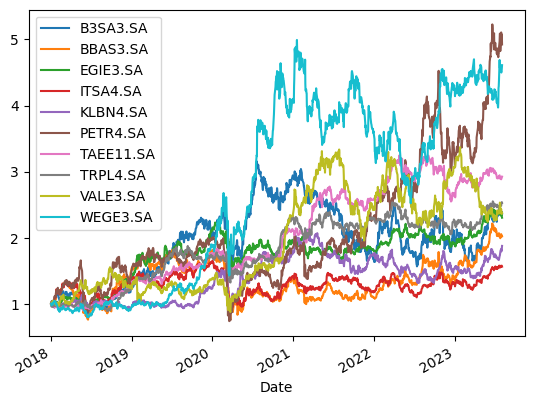

In [23]:
# Transform date into base 1 relative scale
(wallet / wallet.iloc[0]).plot();

# Daily and cumulative return

In [26]:
returns = wallet.pct_change()

In [27]:
# Weighted return, that means, how much each asset acted in the return of the wallet
returns * weights

,B3SA3.SA,BBAS3.SA,EGIE3.SA,ITSA4.SA,KLBN4.SA,PETR4.SA,TAEE11.SA,TRPL4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.001702,0.001275,-0.000672,0.001179,-0.000917,0.000906,0.000140,-0.002033,-0.000599,-0.001519
2018-01-04,0.000644,0.000960,-0.001297,0.001882,0.001235,0.000180,-0.001582,-0.002742,0.000410,-0.000974
2018-01-05,0.001450,0.000000,0.000514,0.000176,-0.001829,0.000598,0.000473,0.001604,0.001561,0.000410
2018-01-08,0.000462,0.000238,0.000568,-0.000088,0.000311,0.001188,-0.000471,-0.000521,0.002223,0.000816
...,...,...,...,...,...,...,...,...,...,...
2023-07-31,0.001223,0.001925,-0.000989,0.000102,0.001535,0.004536,-0.000525,0.000120,0.002262,-0.000992
2023-08-01,-0.001074,-0.001722,0.000613,-0.000204,-0.001944,-0.001639,0.000361,0.001394,-0.001388,-0.000150
2023-08-02,0.000204,0.000443,0.000068,0.000510,0.000881,-0.000229,0.000194,0.000747,-0.001628,0.000426


In [29]:
wallet_return = (returns * weights).sum(axis = 1)

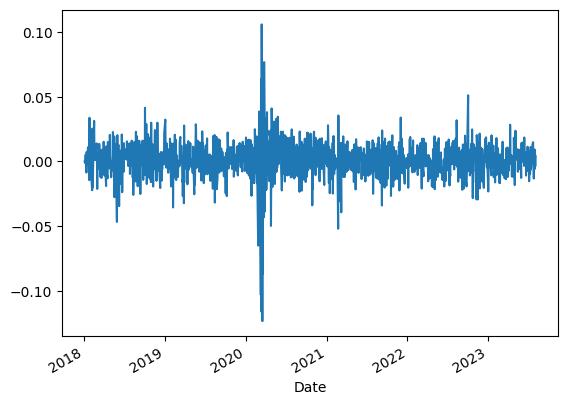

In [31]:
wallet_return.plot();

In [32]:
# Cumulative product on base 0
cumulative_return_wallet = (1 + wallet_return).cumprod() - 1

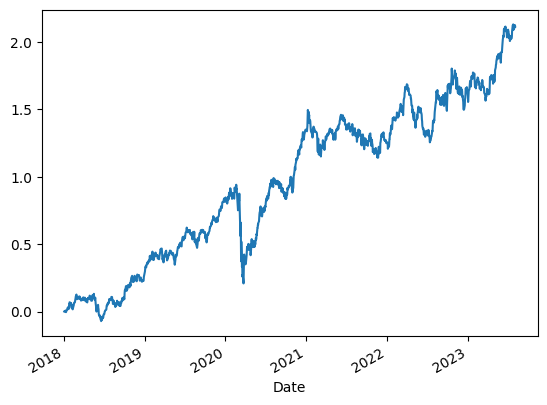

In [34]:
cumulative_return_wallet.plot();

In [44]:
ibov = yf.download("^BVSP", start, end)["Adj Close"]
ibov_return = ibov.pct_change()
cumulative_return_ibov = (1 + ibov_return).cumprod() - 1

[*********************100%***********************]  1 of 1 completed


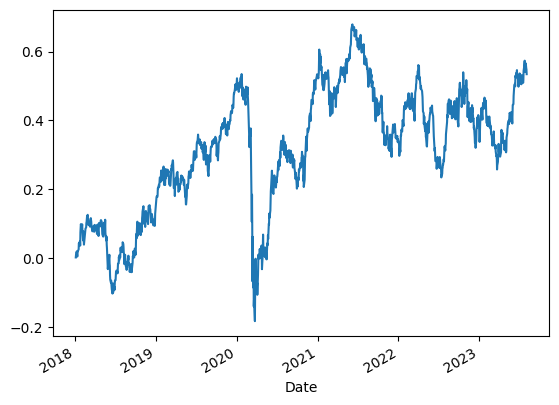

In [46]:
cumulative_return_ibov.plot();

# Comparing performance of IBOV x Wallet 

In [47]:
portifolio_return = pd.DataFrame()
portifolio_return["Wallet Return"] = cumulative_return_wallet
portifolio_return["IBOV Return"] = cumulative_return_ibov
portifolio_return = portifolio_return.dropna()
portifolio_return

,Wallet Return,IBOV Return
Date,,
2018-01-03,-0.000538,0.001335
2018-01-04,-0.001822,0.009706
2018-01-05,0.003125,0.015149
2018-01-08,0.007866,0.019104
2018-01-09,0.004247,0.012492
...,...,...
2023-07-31,2.119721,0.565560
2023-08-01,2.101773,0.556637
2023-08-02,2.106787,0.551643


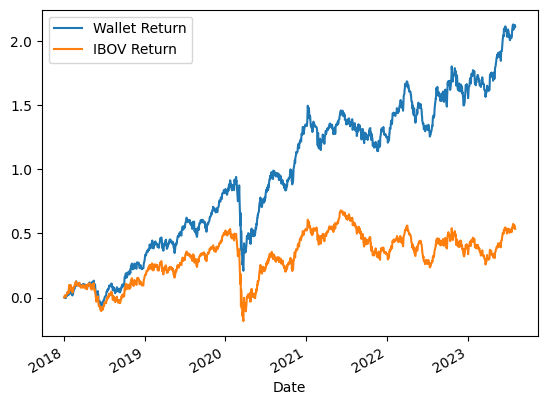

In [48]:
portifolio_return.plot();